In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
population = pd.read_csv('C:/Users/SMAPRJ/Desktop/Juan/The Economist/population.csv')

In [3]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
Year                 70080 non-null int64
District.Code        70080 non-null int64
District.Name        70080 non-null object
Neighborhood.Code    70080 non-null int64
Neighborhood.Name    70080 non-null object
Gender               70080 non-null object
Age                  70080 non-null object
Number               70080 non-null int64
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [4]:
population = population.replace('5-9','05-9')

In [5]:
population['Year'].value_counts()

2017    14016
2016    14016
2015    14016
2014    14016
2013    14016
Name: Year, dtype: int64

In [6]:
population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [7]:
population.describe()

,Year,District.Code,Neighborhood.Code,Number
count,70080.000000,70080.000000,70080.000000,70080.000000
mean,2015.000000,6.246575,37.000000,114.844720
std,1.414224,2.788356,21.071458,96.540389
min,2013.000000,1.000000,1.000000,0.000000
25%,2014.000000,4.000000,19.000000,43.000000
50%,2015.000000,7.000000,37.000000,92.000000
75%,2016.000000,8.000000,55.000000,162.000000
max,2017.000000,10.000000,73.000000,777.000000


In [8]:
population_2017 = population.loc[population['Year']==2017].sort_values('Age')

In [10]:
print(population_2017)

       Year  District.Code        District.Name  Neighborhood.Code  \
0      2017              1         Ciutat Vella                  1   
7126   2017              8           Nou Barris                 46   
7127   2017              8           Nou Barris                 47   
7128   2017              8           Nou Barris                 48   
7129   2017              8           Nou Barris                 49   
7130   2017              8           Nou Barris                 50   
7131   2017              8           Nou Barris                 51   
7132   2017              8           Nou Barris                 52   
7133   2017              8           Nou Barris                 53   
7125   2017              8           Nou Barris                 45   
7134   2017              8           Nou Barris                 54   
7136   2017              8           Nou Barris                 56   
7137   2017              9          Sant Andreu                 57   
7138   2017         

In [9]:
population_2017_by_age=(population_2017.groupby(['Age'])['Number'].sum())

population_2017_by_age = population_2017_by_age.reset_index().replace('5-9','05-9').sort_values('Age')
print(population_2017_by_age)

      Age  Number
0     0-4   68402
1    05-9   69309
2   10-14   67575
3   15-19   65953
4   20-24   79062
5   25-29  106489
6   30-34  122353
7   35-39  134575
8   40-44  133557
9   45-49  118332
10  50-54  113041
11  55-59  102949
12  60-64   90465
13  65-69   86264
14  70-74   77501
15  75-79   59962
16  80-84   59453
17  85-89   41136
18  90-94   19016
19   >=95    5415


Text(0, 0.5, 'Personas')

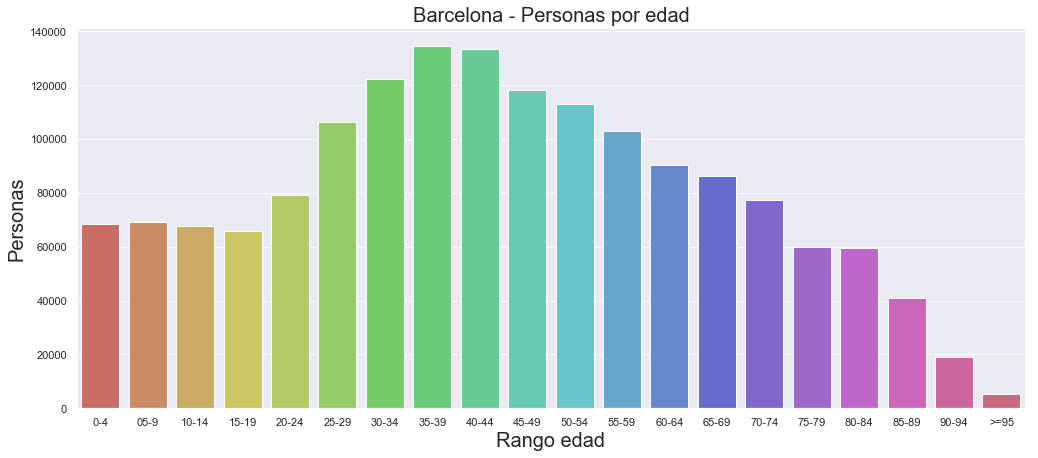

In [150]:
g = sns.barplot(x= population_2017_by_age['Age'], y = population_2017_by_age['Number'], orient='v', palette="hls")
g.set_title("Barcelona - Personas por edad", fontsize=20)
sns.set(rc={'figure.figsize':(17,7)})
g.set_xlabel("Rango edad", fontsize=20)
g.set_ylabel("Personas", fontsize=20)

Text(32.99999999999999, 0.5, 'Distrito')

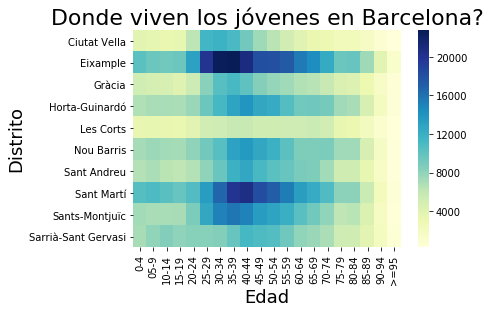

In [10]:
aaa = population_2017.pivot_table(index='District.Name', columns='Age', values='Number', aggfunc='sum')
h = sns.heatmap(aaa, cmap="YlGnBu")
h.set_title("Donde viven los jóvenes en Barcelona?", fontsize=22)
h.set_xlabel("Edad",fontsize=18)
h.set_ylabel("Distrito", fontsize=18)

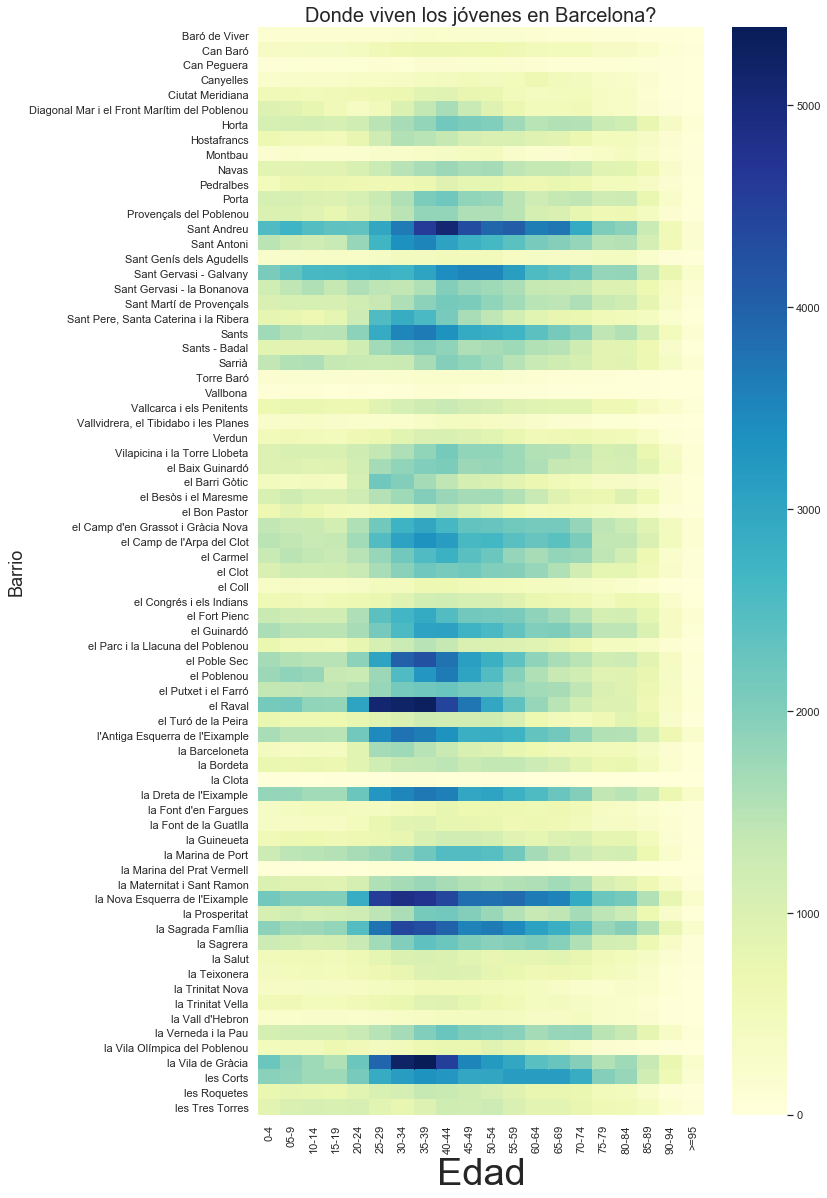

In [17]:
aaa = population_2017.pivot_table(index='Neighborhood.Name', columns='Age', values='Number', aggfunc='sum')
h = sns.heatmap(aaa, cmap="YlGnBu")
h.set_title("Donde viven los jóvenes en Barcelona?", fontsize=20)
h.set_xlabel("Edad",fontsize=38)
h.set_ylabel("Barrio", fontsize=18)
sns.set(rc={'figure.figsize':(5,30)})

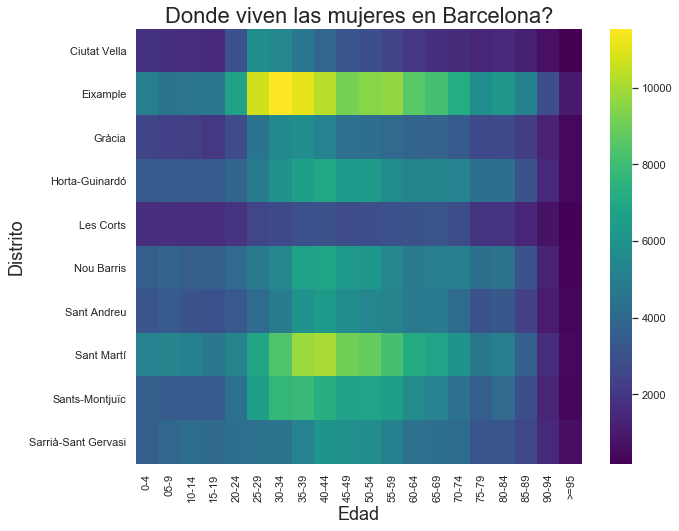

In [31]:
aaa = population_2017.loc[population_2017['Gender']=='Female'].pivot_table(index='District.Name', columns='Age', values='Number', aggfunc='sum')
h = sns.heatmap(aaa, cmap="viridis")
h.set_title("Donde viven las mujeres en Barcelona?", fontsize=22)
h.set_xlabel("Edad",fontsize=18)
h.set_ylabel("Distrito", fontsize=18)
sns.set(rc={'figure.figsize':(8,8)})

Text(129.453125, 0.5, 'Barrios en Eixample')

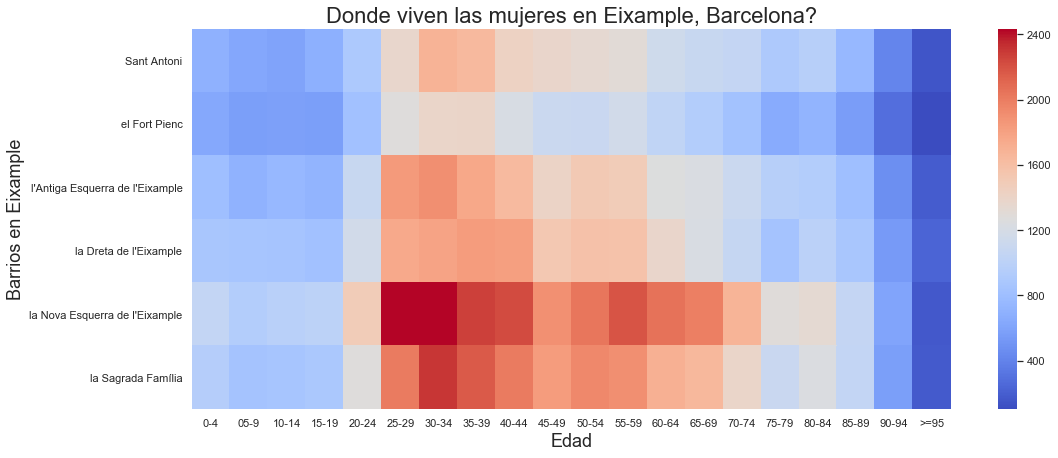

In [131]:
aaa = population_2017.loc[population_2017['Gender']=='Female'].loc[population_2017['District.Name']=='Eixample'].pivot_table(index='Neighborhood.Name', columns='Age', values='Number', aggfunc='sum')
h = sns.heatmap(aaa, cmap='coolwarm')
h.set_title("Donde viven las mujeres en Eixample, Barcelona?", fontsize=22)
h.set_xlabel("Edad",fontsize=18)
h.set_ylabel("Barrios en Eixample", fontsize=18)


In [32]:
population_25_29 = (population.loc[population['Age']=='25-29'].groupby(['Year','District.Name','Neighborhood.Name'])['Number'].sum()).reset_index()
print(population_25_29)

     Year        District.Name                             Neighborhood.Name  \
0    2013         Ciutat Vella         Sant Pere, Santa Caterina i la Ribera   
1    2013         Ciutat Vella                                el Barri Gòtic   
2    2013         Ciutat Vella                                      el Raval   
3    2013         Ciutat Vella                                la Barceloneta   
4    2013             Eixample                                   Sant Antoni   
5    2013             Eixample                                 el Fort Pienc   
6    2013             Eixample               l'Antiga Esquerra de l'Eixample   
7    2013             Eixample                        la Dreta de l'Eixample   
8    2013             Eixample                la Nova Esquerra de l'Eixample   
9    2013             Eixample                            la Sagrada Família   
10   2013               Gràcia                     Vallcarca i els Penitents   
11   2013               Gràcia          

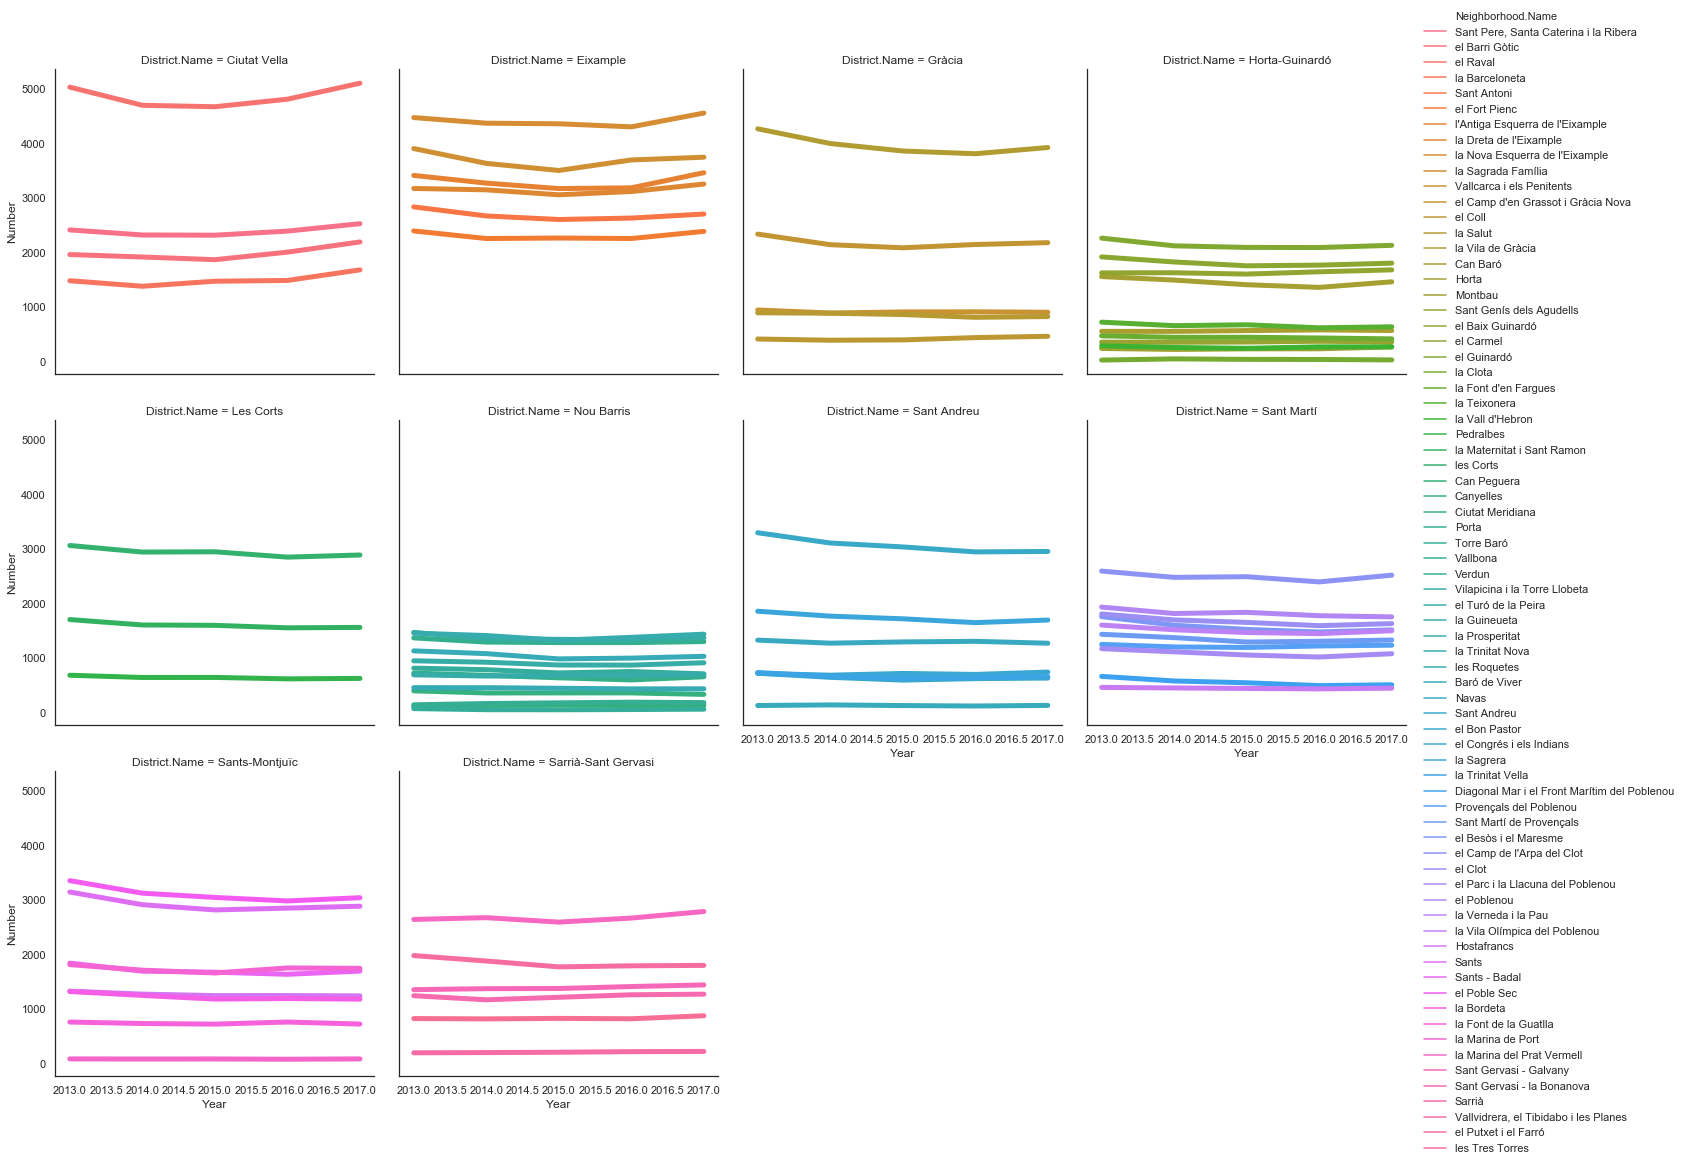

In [243]:
sns.set_style("white")
g = sns.relplot(x="Year", y="Number", hue='Neighborhood.Name',kind="line", col_wrap=4, col='District.Name', linewidth=5,  dashes=True, markers=True, data=population_25_29).despine()

In [48]:
population_total = (population_2017.groupby(['Year','District.Name'])['Number'].sum()).sort_values()
print(population_total)

Year  District.Name      
2017  Les Corts               82033
      Ciutat Vella           101387
      Gràcia                 121347
      Sant Andreu            147594
      Sarrià-Sant Gervasi    149279
      Nou Barris             166579
      Horta-Guinardó         168751
      Sants-Montjuïc         181910
      Sant Martí             235513
      Eixample               266416
Name: Number, dtype: int64


In [49]:
population_25_29 = (population_2017.loc[population_2017['Age']=='25-29'].groupby(['Year','District.Name'])['Number'].sum()).sort_values()
print(population_25_29)

Year  District.Name      
2017  Les Corts               5076
      Sant Andreu             8085
      Gràcia                  8297
      Sarrià-Sant Gervasi     8400
      Nou Barris              9265
      Horta-Guinardó          9628
      Ciutat Vella           11506
      Sants-Montjuïc         12598
      Sant Martí             13520
      Eixample               20114
Name: Number, dtype: int64


In [109]:
merged_population = pd.merge(population_25_29, population_total, left_on="District.Name", right_on="District.Name",how="inner")
merged_population['Ratio'] = merged_population['Number_x']/merged_population['Number_y']*100
merged_population = merged_population.sort_values('Ratio', ascending= False)
merged_population.columns = ['25_to_29', 'Total population', 'Ratio']
print(merged_population)

                     25_to_29  Total population      Ratio
District.Name                                             
Ciutat Vella            11506            101387  11.348595
Eixample                20114            266416   7.549847
Sants-Montjuïc          12598            181910   6.925403
Gràcia                   8297            121347   6.837417
Les Corts                5076             82033   6.187754
Sant Martí              13520            235513   5.740660
Horta-Guinardó           9628            168751   5.705448
Sarrià-Sant Gervasi      8400            149279   5.627047
Nou Barris               9265            166579   5.561926
Sant Andreu              8085            147594   5.477865


Text(0.5, 1.0, '% de gente entre 25_29 ')

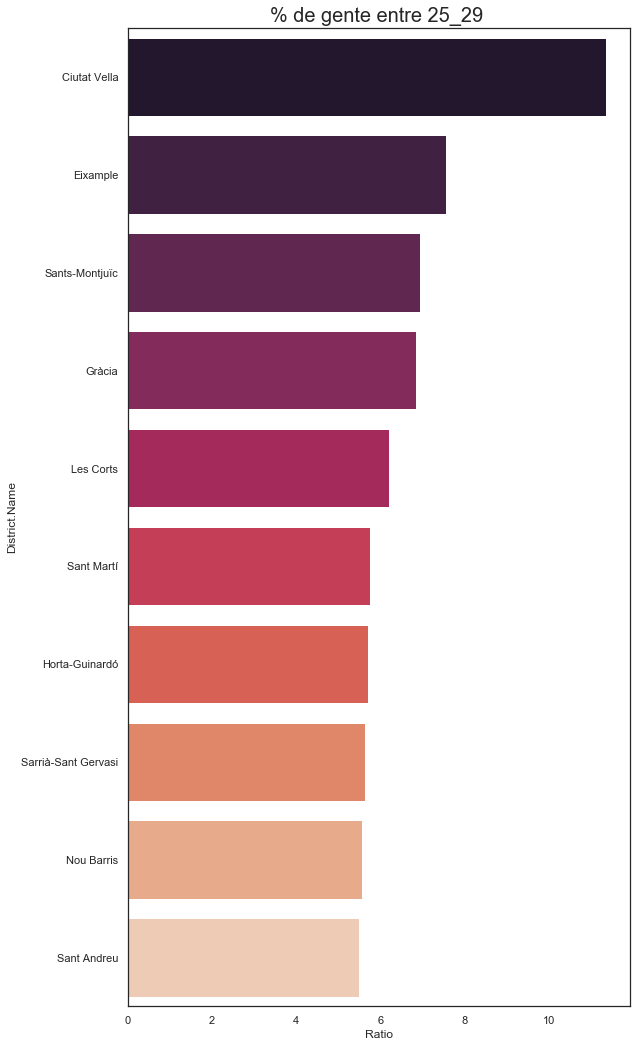

In [135]:
sns.set_style("white")
a = sns.barplot(y=merged_population.index, x="Ratio", data = merged_population, orient='h', palette='rocket')
a.set_title('% de gente entre 25_29 ', fontsize =20)

In [116]:
population_total_Neighborhood = (population_2017.groupby(['Year','Neighborhood.Name'])['Number'].sum()).sort_values()
print(population_total_Neighborhood)

Year  Neighborhood.Name                           
2017  la Clota                                          610
      la Marina del Prat Vermell                       1149
      Vallbona                                         1372
      Can Peguera                                      2271
      Baró de Viver                                    2539
      Torre Baró                                       2856
      Vallvidrera, el Tibidabo i les Planes            4670
      Montbau                                          5102
      la Vall d'Hebron                                 5784
      Sant Genís dels Agudells                         6854
      Canyelles                                        6856
      la Trinitat Nova                                 7261
      el Coll                                          7412
      Can Baró                                         8994
      la Vila Olímpica del Poblenou                    9367
      la Font d'en Fargues                       

In [117]:
population_25_29_Neighborhood = (population_2017.loc[population_2017['Age']=='25-29'].groupby(['Year','Neighborhood.Name'])['Number'].sum()).sort_values()
print(population_25_29_Neighborhood)

Year  Neighborhood.Name                           
2017  la Clota                                          30
      Vallbona                                          62
      la Marina del Prat Vermell                        85
      Baró de Viver                                    131
      Can Peguera                                      133
      Torre Baró                                       182
      Vallvidrera, el Tibidabo i les Planes            222
      Montbau                                          268
      la Vall d'Hebron                                 270
      Canyelles                                        333
      Sant Genís dels Agudells                         360
      la Font d'en Fargues                             416
      la Trinitat Nova                                 435
      la Vila Olímpica del Poblenou                    447
      el Coll                                          463
      Diagonal Mar i el Front Marítim del Poblenou     509
     

In [118]:
merged_population_Neighborhood = pd.merge(population_25_29_Neighborhood, population_total_Neighborhood, left_on="Neighborhood.Name", right_on="Neighborhood.Name",how="inner")
merged_population_Neighborhood['Ratio'] = merged_population_Neighborhood['Number_x']/merged_population_Neighborhood['Number_y']*100
merged_population_Neighborhood = merged_population_Neighborhood.sort_values('Ratio', ascending= False)
merged_population_Neighborhood.columns = ['25_to_29', 'Total population', 'Ratio']
print(merged_population_Neighborhood)

                                              25_to_29  Total population  \
Neighborhood.Name                                                          
el Barri Gòtic                                    2193             16062   
la Barceloneta                                    1681             14996   
Sant Pere, Santa Caterina i la Ribera             2528             22721   
el Raval                                          5104             47608   
l'Antiga Esquerra de l'Eixample                   3463             42284   
la Nova Esquerra de l'Eixample                    4557             58180   
Hostafrancs                                       1241             15904   
la Vila de Gràcia                                 3925             50662   
el Poble Sec                                      3041             40228   
el Fort Pienc                                     2387             32016   
la Marina del Prat Vermell                          85              1149   
la Dreta de 

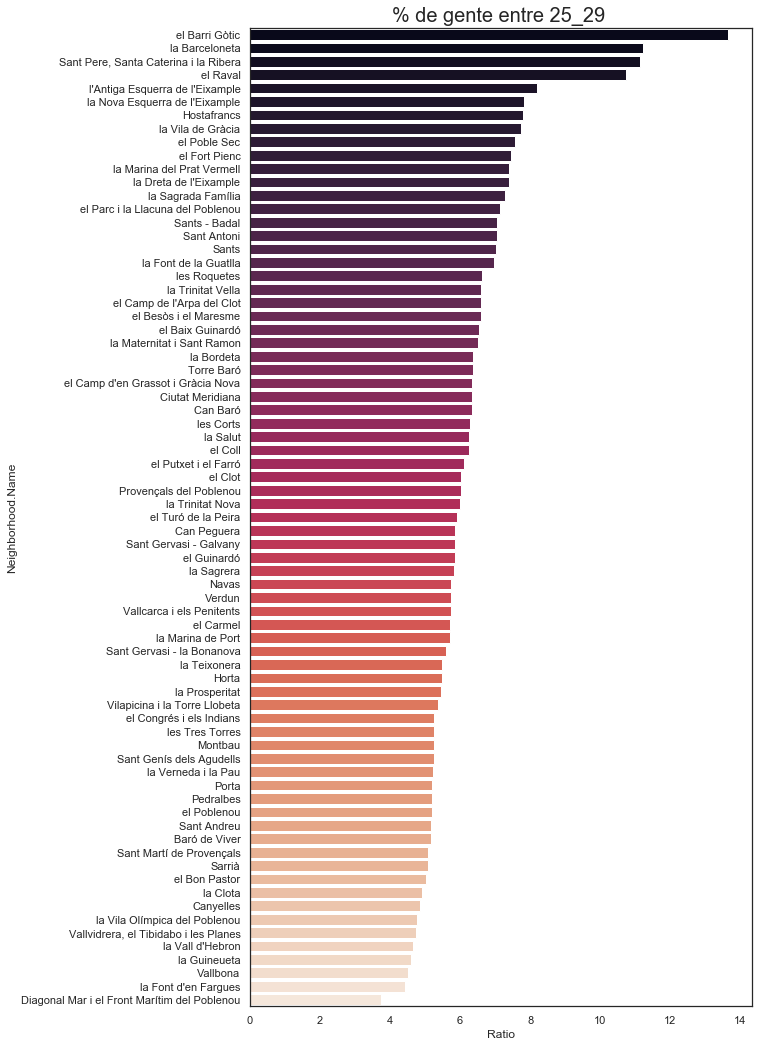

In [136]:
sns.set_style("white")
a = sns.barplot(y=merged_population_Neighborhood.index, x="Ratio", data = merged_population_Neighborhood, orient='h', palette='rocket')
a.set_title('% de gente entre 25_29 ', fontsize =20)
sns.set(rc={'figure.figsize':(9,18)})